In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Метод прогонки

**Метод прогонки** *(англ. tridiagonal matrix algorithm)* или **алгоритм Томаса** *(англ. Thomas algorithm)* используется для решения систем линейных уравнений вида $Ax=F$, где $A$ — трёхдиагональная матрица. 

Система уравнений $Ax = F$ равносильна соотношению

$$A_i x_{i-1} + B_i x_i + C_i x_{i+1} = F_i. \tag{1}$$

Метод прогонки основывается на предположении, что искомые неизвестные связаны рекуррентным соотношением:

$$x_i = \alpha_{i+1} x_{i+1} + \beta_{i+1},$$

где $i = n - 1, n - 2, \ldots, 1. \tag{2}$

Используя это соотношение, выразим $x_{i-1}$ и $x_i$ через $x_{i+1}$ и подставим в уравнение (1):

$$(A_i \alpha_i \alpha_{i+1} + B_i \alpha_{i+1} + C_i) x_{i+1} + A_i \alpha_i \beta_{i+1} + A_i \beta_i + B_i \beta_{i+1} - F_i = 0,$$

где $F_i$ — правая часть $i$-го уравнения. Это соотношение будет выполняться независимо от решения, если потребовать

$$
\begin{cases} 
A_i \alpha_i \alpha_{i+1} + B_i \alpha_{i+1} + C_i = 0 \\ 
A_i \alpha_i \beta_{i+1} + A_i \beta_i + B_i \beta_{i+1} - F_i = 0 
\end{cases}
$$

Отсюда следует:

$$
\begin{cases} 
\alpha_{i+1} = -\frac{C_i}{A_i \alpha_i + B_i} \\ 
\beta_{i+1} = \frac{F_i - A_i \beta_i}{A_i \alpha_i + B_i} 
\end{cases}
$$

Из первого уравнения получим:

$$
\begin{cases} 
\alpha_2 = \frac{-C_1}{B_1} \\ 
\beta_2 = \frac{F_1}{B_1} 
\end{cases}
$$

После нахождения прогоночных коэффициентов $\alpha$ и $\beta$, используя уравнение (2), получим решение системы. При этом,

$$x_i = \alpha_{i+1} x_{i+1} + \beta_{i+1},   i = n - 1, \ldots, 1$$

$$x_n = \frac{F_n - A_n \beta_n}{B_n + A_n \alpha_n}$$

In [2]:
def traditional_matrix_algorithm(A: np.ndarray, B: np.ndarray, C: np.ndarray, F: np.ndarray) -> tuple[np.ndarray, float]:
    """
    Solves a tridiagonal system of linear equations using the Thomas algorithm (a simplified form of Gaussian elimination).
    
    The system has the form:
    B[0]X[0] + C[0]X[1] = F[0]
    A[i-1]X[i-1] + B[i]X[i] + C[i]X[i+1] = F[i]  for i = 1,...,n-2
    A[-1]X[-2] + B[-1]X[-1] = F[-1]
    
    Parameters:
    -----------
    A : np.ndarray
        Lower diagonal of the matrix (length n-1), elements A[0] to A[n-2]
    B : np.ndarray 
        Main diagonal of the matrix (length n), elements B[0] to B[n-1]
    C : np.ndarray
        Upper diagonal of the matrix (length n-1), elements C[0] to C[n-2]
    F : np.ndarray
        Right-hand side vector (length n)
        
    Returns:
    --------
    tuple[np.ndarray, float]
        - Solution vector X (length n)
        - Execution time in seconds
        
    Notes:
    ------
    - The algorithm has O(n) complexity
    - For numerical stability, the matrix should be diagonally dominant:
      |B[i]| ≥ |A[i-1]| + |C[i]| for all i
      
    Example:
    --------
    >>> import numpy as np
    >>> # Solve the system:
    >>> # [ 2  1  0 ] [x0]   [4]
    >>> # [ 1  2  1 ] [x1] = [8]
    >>> # [ 0  1  2 ] [x2]   [8]
    >>> A = np.array([1, 1])  # lower diag
    >>> B = np.array([2, 2, 2])  # main diag
    >>> C = np.array([1, 1])  # upper diag
    >>> F = np.array([4, 8, 8])  # rhs
    >>> X, time = traditional_matrix_algorithm(A, B, C, F)
    >>> print(f"Solution: {X}, Time: {time:.6f} sec")
    Solution: [1. 2. 3.], Time: 0.000012 sec
    """
    start_time = time.time()
    
    n = len(F)
    X = np.zeros(n)
    
    alpha = np.zeros(n)
    beta = np.zeros(n)
    
    alpha[1] = -C[0] / B[0]
    beta[1] = F[0] / B[0]
    
    for i in range(1, n-1):
        alpha[i+1] = -C[i] / (B[i] + A[i-1] * alpha[i])
        beta[i+1] = (F[i] - A[i-1] * beta[i]) / (B[i] + A[i-1] * alpha[i]) 
    
    X[-1] = (F[-1] - A[-1] * beta[-1]) / (A[-1] * alpha[-1] + B[-1])
    
    for i in range(n - 2, -1, -1):
        X[i] = alpha[i+1] * X[i+1] + beta[i+1]
        
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    return X, elapsed_time

## Пример использования функции для рещения простой СЛАУ

$$
\begin{cases} 
2x_1 + x_2 = 3 \\ 
x_1 + 2x_2 + x_3 = 4 \\ 
x_2 + 2x_3 + x_4 = 4 \\ 
x_3 + 2x_4 = 3 
\end{cases}
$$

**Система в матричной форме:**
$$
A \cdot x = b \quad \Rightarrow \quad 
\begin{pmatrix} 
2 & 1 & 0 & 0 \\ 
1 & 2 & 1 & 0 \\ 
0 & 1 & 2 & 1 \\ 
0 & 0 & 1 & 2 
\end{pmatrix}
\cdot 
\begin{pmatrix} 
x_1 \\ 
x_2 \\ 
x_3 \\ 
x_4 
\end{pmatrix}
= 
\begin{pmatrix} 
3 \\ 
4 \\ 
4 \\ 
3 
\end{pmatrix}
$$

Решение:

$$
\begin{cases} 
x_1 = 1 \\ 
x_2 = 1 \\ 
x_3 = 1 \\ 
x_4 = 1 
\end{cases}
$$



In [10]:
A = [1, 1, 1]
B = [2, 2, 2, 2]
C = [1, 1, 1]
F = [3, 4, 4, 3]
traditional_matrix_algorithm(A, B, C, F)

(array([1., 1., 1., 1.]), 0.0)

## Пример использования для слау посложнее

In [17]:
C = [2, 5, 8, 11, 14]
B = [1, 4, 7, 10, 13, 16]
A = [3, 6, 9, 12, 15]
F = [5, 6, 7, 8, 9, 10]
traditional_matrix_algorithm(A, B, C, F)

(array([ 0.61077844,  2.19461078, -0.92215569,  0.03592814,  1.4491018 ,
        -0.73353293]),
 0.0)

# Эксперимент 1: Зависимость от размера матрицы

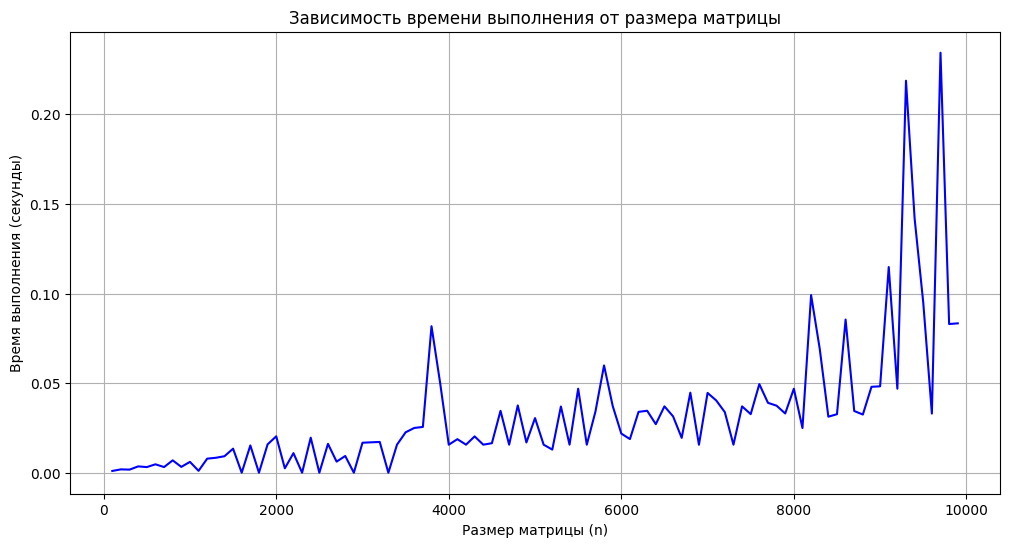

In [10]:
sizes = range(100, 10000, 100)
times_size = []

for n in sizes:
    A = np.ones(n-1)
    B = 2 * np.ones(n)
    C = np.ones(n-1)
    F = np.concatenate([[3], 4*np.ones(n-2), [3]])
    _, t = traditional_matrix_algorithm(A, B, C, F)
    times_size.append(t)

plt.figure(figsize=(12, 6))
plt.plot(sizes, times_size, 'b-')
plt.title('Зависимость времени выполнения от размера матрицы')
plt.xlabel('Размер матрицы (n)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

# Вывод:

### При увеличении размера матрицы растет время работы алгоритма

# Эксперимент 2: Зависимость от величины элементов

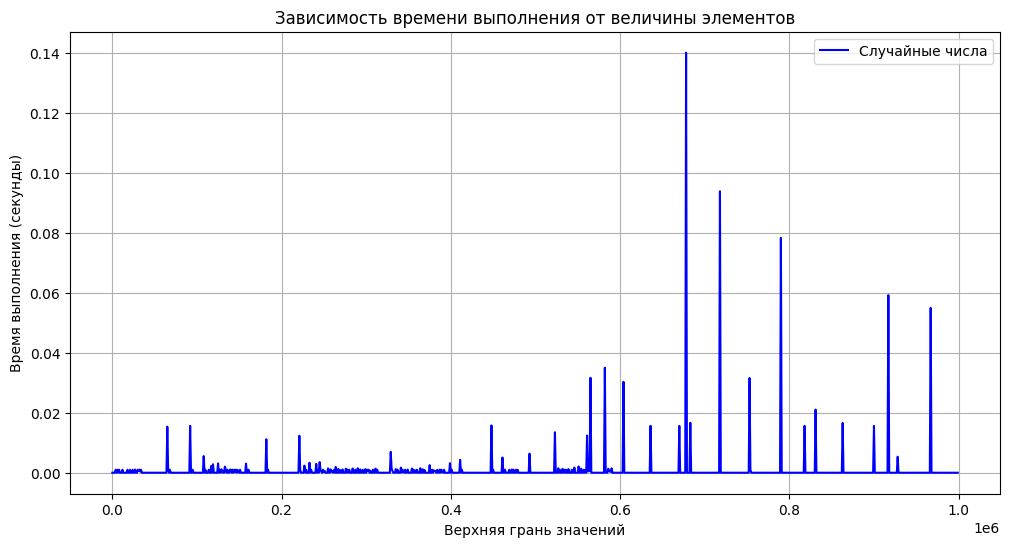

In [107]:
numbers = range(0, 1000000, 1000)
nums_random = []

for n in numbers:
    A = np.random.rand(99) * n
    B = np.random.rand(100) * n + 100
    C = np.random.rand(99) * n
    F = np.random.rand(100) * n
    
    _, t = traditional_matrix_algorithm(A, B, C, F)
    nums_random.append(t)

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(numbers, nums_random, 'b-', label='Случайные числа')
plt.title('Зависимость времени выполнения от величины элементов')
plt.xlabel('Верхняя грань значений')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.legend()
plt.show()

# Вывод:

### При увеличении элементов матрицы растет время работы алгоритма, но незначительно

# Эксперимент 3: Зависимость от значений на диагонали B

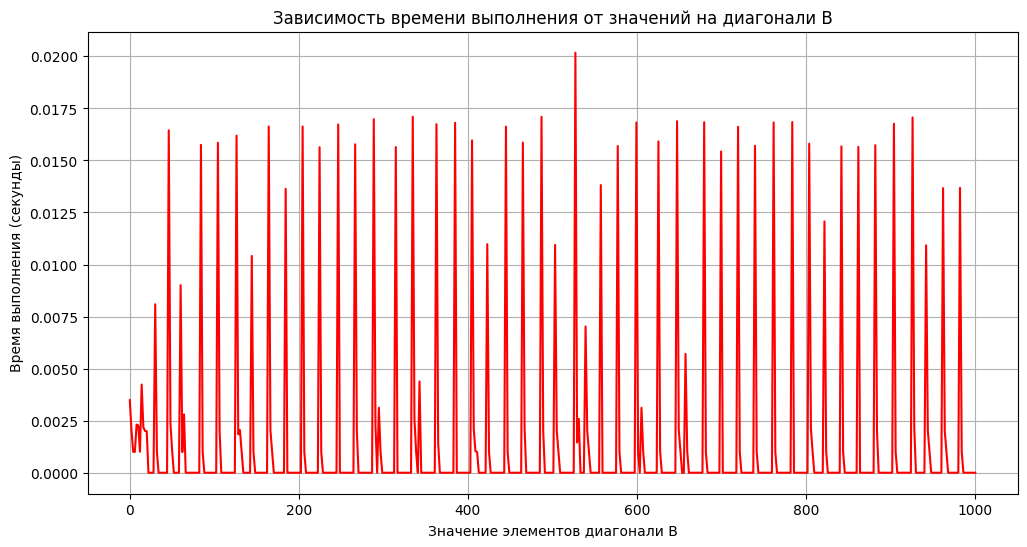

In [140]:
diag_values = np.linspace(0.1, 1000, 500)
times_diag = []
n = 1000

for val in diag_values:
    A = np.ones(n-1)
    B = val * np.ones(n)
    C = np.ones(n-1)
    F = np.ones(n)
    _, t = traditional_matrix_algorithm(A, B, C, F)
    times_diag.append(t)

plt.figure(figsize=(12, 6))
plt.plot(diag_values, times_diag, 'r-')
plt.title('Зависимость времени выполнения от значений на диагонали B')
plt.xlabel('Значение элементов диагонали B')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

# Вывод:

## Разница значений на диагоналях A, C и B не имеет выраженного влияние на время работы алгоритма

# Эксперимент 4: Влияние разреженности матрицы

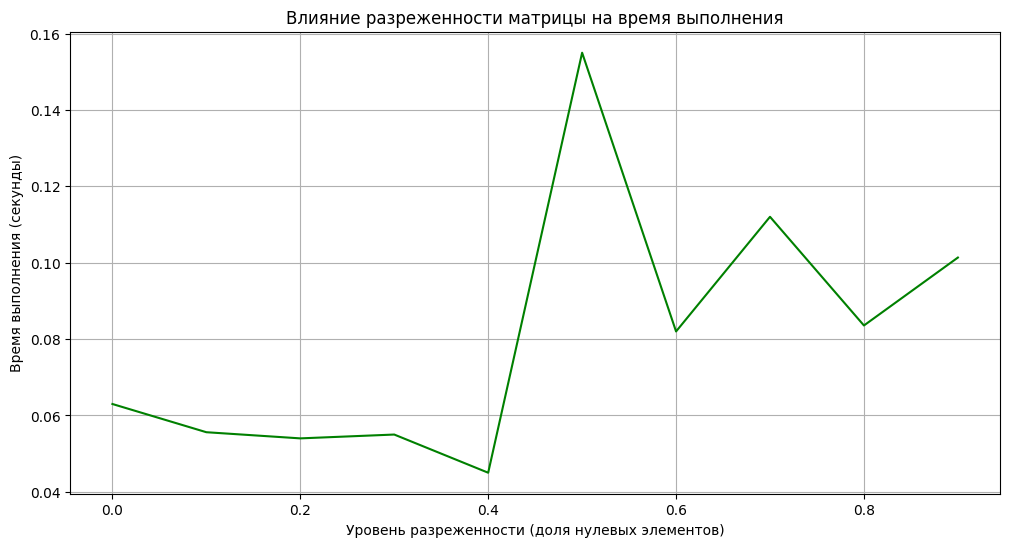

In [170]:
sparsity_levels = np.linspace(0, 0.9, 10)
times_sparse = []
n = 20000

for sparsity in sparsity_levels:
    A = np.random.choice([0, 1], size=n-1, p=[sparsity, 1-sparsity])
    B = 2 * np.ones(n)
    C = np.random.choice([0, 1], size=n-1, p=[sparsity, 1-sparsity])
    F = np.concatenate([[3], 4*np.ones(n-2), [3]])
    _, t = traditional_matrix_algorithm(A, B, C, F)
    times_sparse.append(t)

plt.figure(figsize=(12, 6))
plt.plot(sparsity_levels, times_sparse, 'g-')
plt.title('Влияние разреженности матрицы на время выполнения')
plt.xlabel('Уровень разреженности (доля нулевых элементов)')
plt.ylabel('Время выполнения (секунды)')
plt.grid(True)
plt.show()

# Вывод:

## Рост нулевых элементов в матрице не влияет на время работы алгоритма линейно

# Эксперимент 5: Сравнение для разных типов матриц

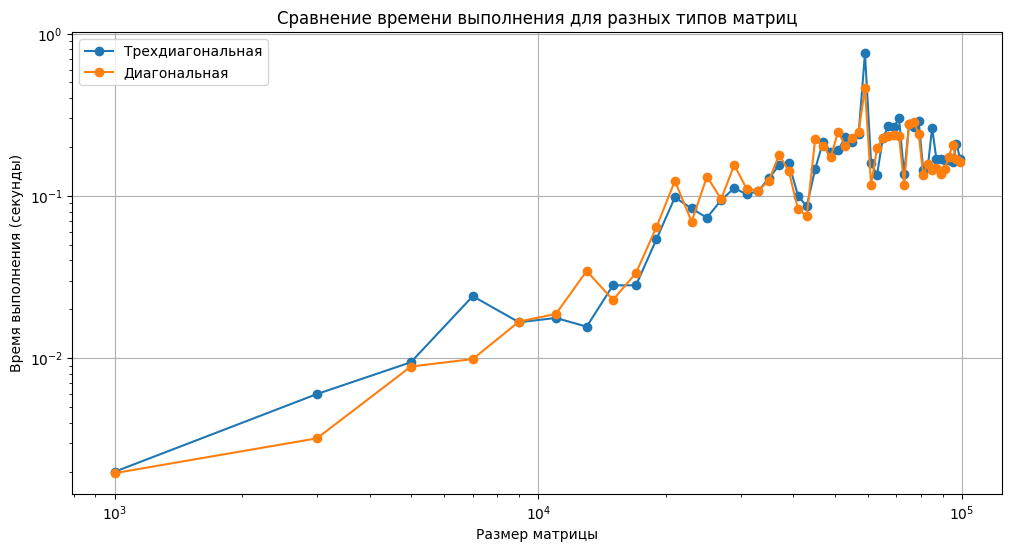

In [187]:
n_values = range(1000, 100000, 2000)
results = {'Трехдиагональная': [], 'Диагональная': []}

for n in n_values:
    # Тридиагональная
    A = np.ones(n-1)
    B = 2 * np.ones(n)
    C = np.ones(n-1)
    F = np.concatenate([[3], 4*np.ones(n-2), [3]])
    _, t = traditional_matrix_algorithm(A, B, C, F)
    results['Трехдиагональная'].append(t)
    
    # Диагональная (A и C нулевые)
    A = np.zeros(n-1)
    C = np.zeros(n-1)
    _, t = traditional_matrix_algorithm(A, B, C, F)
    results['Диагональная'].append(t)

plt.figure(figsize=(12, 6))
for label, times in results.items():
    plt.plot(n_values, times, 'o-', label=label)
    
plt.title('Сравнение времени выполнения для разных типов матриц')
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения (секунды)')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

# Вывод:

## Диагональная матрица не имеет выраженного преимущества над трехдиагональной матрицей при измерении времени работы алгоритма